# DBScan

DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.

It groups ‘densely grouped’ data points into a single cluster.

In [89]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
from collections import Counter
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [90]:
X

,english,windows,mac,linux,Single-player,Multi-player,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,year,est_owners,num_categories,num_genres,num_steamspy_tags
0,1,1,1,1,0,1,-0.147507,-0.128306,6.505741,0.730006,9.557829,0.072624,0.141186,-7.648808,5.213985,0.306835,-1.368178,0.311447
1,1,1,1,1,0,1,-0.147507,-0.128306,0.122045,0.098480,0.069619,-0.035710,-0.265175,-8.112426,4.636120,0.306835,-1.368178,0.311447
2,1,1,1,1,0,1,-0.147507,-0.128306,0.127206,0.043636,0.020358,-0.047606,-0.265175,-6.257955,4.636120,-0.587702,-1.368178,0.311447
3,1,1,1,1,0,1,-0.147507,-0.128306,0.014348,0.013063,0.059220,0.016120,-0.265175,-7.185190,4.636120,0.306835,-1.368178,0.311447
4,1,1,1,1,1,1,-0.147507,-0.128306,0.223792,0.017964,0.259548,0.114258,-0.265175,-8.112426,4.636120,-0.140433,-1.368178,0.311447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1,1,0,0,1,0,-0.147507,-0.108457,-0.052535,-0.049249,-0.081995,-0.062050,-0.506452,1.159926,-0.544894,-0.587702,0.131950,0.311447
27071,1,1,0,0,1,0,-0.147507,-0.128306,-0.052272,-0.049016,-0.081995,-0.062050,-0.557247,1.159926,-0.544894,-1.034970,0.131950,0.311447
27072,1,1,0,0,1,1,-0.147507,-0.060252,-0.052693,-0.049016,-0.081995,-0.062050,-0.265175,1.159926,-0.544894,1.648640,0.131950,0.311447
27073,1,1,1,0,1,0,-0.147507,-0.128306,-0.052588,-0.049249,-0.081995,-0.062050,-0.112790,1.159926,-0.544894,-0.587702,0.131950,0.311447


In [91]:
X.shape

(27075, 18)

First, randomly assigning eps and min samples



In [97]:
# Compute DBSCAN
db = DBSCAN(eps=0.7, min_samples=100).fit(X)
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("labels:",labels)
print("no. of clusters:",n_clusters_)
print("no. of noise:",n_noise_)

labels: [-1 -1 -1 ... -1 11 11]
no. of clusters: 16
no. of noise: 14648


In [93]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

so, using the hyperparameters provided above , we find that the number of clusters are 43

In [94]:
#silhouette method

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. 


Using silhouette method to check if obtained clusters are optimal on the basis of the parameters provided

In [95]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 16
Estimated number of noise points: 14648
Silhouette Coefficient: -0.143


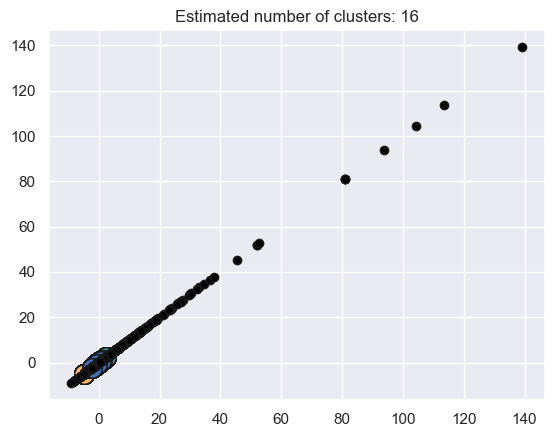

In [98]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

in this case, we have got silhouette coefficient as -0.143 which does not seem appropriate as it is not close to 1 indicating that the clusters we have created are not optimal.A higher silhouette coefficient refers to a model with more coherent clusters

In [131]:
X.shape

(27075, 18)

Usually, the optimal value of min points/samples is twice of features(columns). The number of columns of 'X ' =18 hence let's take min samples/points =36

Now, we know one parameter but we are yet to find optimal value of eps

Using K Nearest Neighbor method to find optimal value of eps

In [ ]:
#K Nearest Neighbor

In [141]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors(n_neighbors=36).fit(X)
neigh_dist,neigh_ind=nbrs.kneighbors(X)
sort_neigh_dist=np.sort(neigh_dist,axis=0)


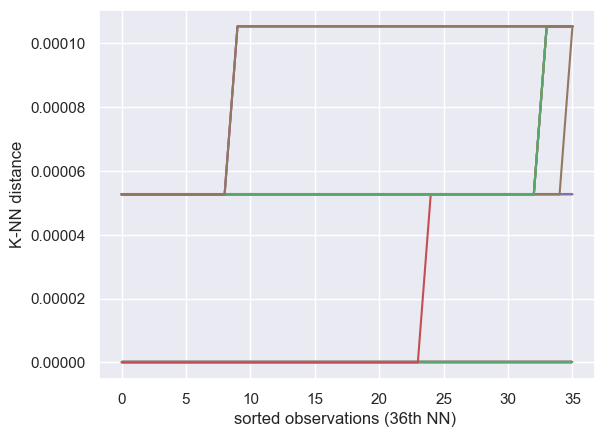

In [142]:
k_dist=sort_neigh_dist[:36]
plt.plot(k_dist)
plt.ylabel("K-NN distance")
plt.xlabel("sorted observations (36th NN) ")
plt.show()

In [143]:
neighbors=NearestNeighbors(n_neighbors=36)
neighbors_fit=neighbors.fit(X)
distance,indices=neighbors_fit.kneighbors(X)

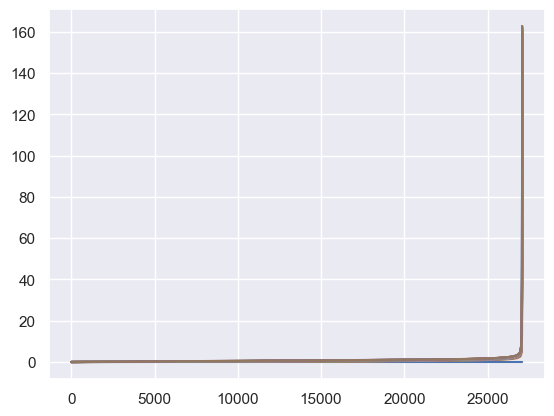

In [144]:
distances=np.sort(distance,axis=0)
distance=distances[:,1]
plt.plot(distances)

In [145]:
distances

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.26637901e-05, 5.26637901e-05, 5.26637901e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.26637901e-05, 5.26637901e-05, 5.26637901e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.26637901e-05, 5.26637901e-05, 5.26637901e-05],
       ...,
       [6.74349576e-07, 5.22514059e+01, 5.22937628e+01, ...,
        1.13495814e+02, 1.13566967e+02, 1.13700484e+02],
       [6.74349576e-07, 8.23835993e+01, 8.30806699e+01, ...,
        1.25283335e+02, 1.25322678e+02, 1.25324786e+02],
       [1.90734863e-06, 1.11771716e+02, 1.14985790e+02, ...,
        1.62621784e+02, 1.62722222e+02, 1.62738767e+02]])

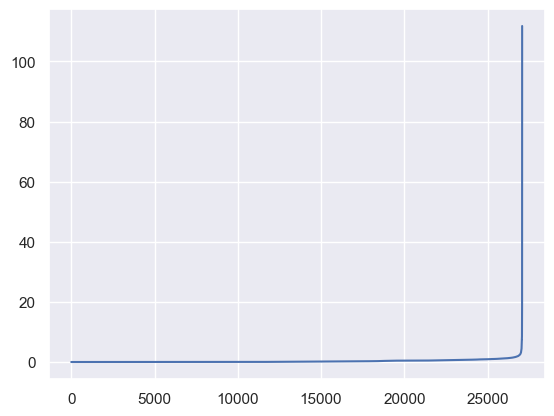

In [146]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)


As we can see through graph , optimal value of eps is somewhere between 5 to 8

In [ ]:
#GridSearch

Using GridSearch method to find the optimal eps hyperparameter which can work best to find optimal number of clusters 

In [148]:
def dbscan_grid_search(X_data, eps_space ,min_samples_space ):#, min_clust = 0, max_clust = 10):

    """
Performs a hyperparameter grid search for DBSCAN.

Parameters:
    * X_data            = data used to fit the DBSCAN instance
   
    * eps_space         = the range values for the eps parameter
    * min_samples_space = the range values for the min_samples parameter
    * min_clust         = the minimum number of clusters required after each search iteration in order for a result to be appended to the lst
    * max_clust         = the maximum number of clusters required after each search iteration in order for a result to be appended to the lst

Returns

 * lst               = a list to store the results of the grid search
    * clst_count        = a list to store the number of non-whitespace clusters


Example:

# Loading Libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Loading iris dataset
iris = datasets.load_iris()
X = iris.data[:, :] 
y = iris.target

# Scaling X data
dbscan_scaler = StandardScaler()

dbscan_scaler.fit(X)

dbscan_X_scaled = dbscan_scaler.transform(X)

# Setting empty lists in global environment
dbscan_clusters = []
cluster_count   = []


# Inputting function parameters
dbscan_grid_search(X_data = dbscan_X_scaled,
                   lst = dbscan_clusters,
                   clst_count = cluster_count
                   eps_space = pd.np.arange(0.1, 5, 0.1),
                   min_samples_space = pd.np.arange(1, 50, 1),
                   min_clust = 3,
                   max_clust = 6)

"""

    # Importing counter to count the amount of data in each cluster
    


    # Starting a tally of total iterations
    n_iterations = 0

    clst_count = []
    dbscan_clusters = []
    
    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:
            
            print("eps : ",eps_val , "| min_sample : ",samples_val  )

            dbscan_grid = DBSCAN(eps = eps_val,
                                 min_samples = samples_val)


            # fit_transform
            clusters = dbscan_grid.fit_predict(X = X_data)
            print(clusters)
            
            labels = dbscan_grid.labels_
            print("LABELS : ", labels)


            # Counting the amount of data in each cluster
            cluster_count = Counter(clusters)
            print(cluster_count)
            


            # Saving the number of clusters
            n_clusters = sum(abs(pd.np.unique(clusters))) - 1
            print("n_clusters : ", n_clusters)
            
            


            # Increasing the iteration tally with each run of the loop
            n_iterations += 1


            # Appending the lst each time n_clusters criteria is reached
            #if n_clusters >= min_clust and n_clusters <= max_clust:
                
            sc = sklearn.metrics.silhouette_score(X_data, labels)

            dbscan_clusters.append([eps_val,
                                    samples_val,
                                    n_clusters,sc])
            print("silhouette_score : ", sc)

            clst_count.append(cluster_count)
            print("========================================")     
            

    # Printing grid search summary information
   
    print(f"""Hyperparameter combinations checked: {n_iterations}. \n""")
    return dbscan_clusters


#finding silhoutee coefficient and number of clusters for each value of eps

In [154]:
clustering_metric_and_hyper = dbscan_grid_search(X, eps_space = [1.13,5.266, 6.74, 8.23], min_samples_space = [36])

eps :  1.13 | min_sample :  36
[-1 -1 -1 ...  0  0  0]
LABELS :  [-1 -1 -1 ...  0  0  0]
Counter({0: 21322, -1: 3306, 2: 1843, 3: 434, 1: 87, 4: 83})
n_clusters :  10
silhouette_score :  0.23250613108373094
eps :  5.266 | min_sample :  36
[-1  0  0 ...  0  0  0]
LABELS :  [-1  0  0 ...  0  0  0]
Counter({0: 27012, -1: 63})
n_clusters :  0
silhouette_score :  0.8807506848976562
eps :  6.74 | min_sample :  36
[-1  0  0 ...  0  0  0]
LABELS :  [-1  0  0 ...  0  0  0]
Counter({0: 27023, -1: 52})
n_clusters :  0
silhouette_score :  0.893251288504506
eps :  8.23 | min_sample :  36
[0 0 0 ... 0 0 0]
LABELS :  [0 0 0 ... 0 0 0]
Counter({0: 27037, -1: 38})
n_clusters :  0
silhouette_score :  0.9101492201726439
Hyperparameter combinations checked: 4. 



Using 5.26 as eps

In [150]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=5.26, min_samples=36).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 1
Estimated number of noise points: 63
Silhouette Coefficient: 0.881


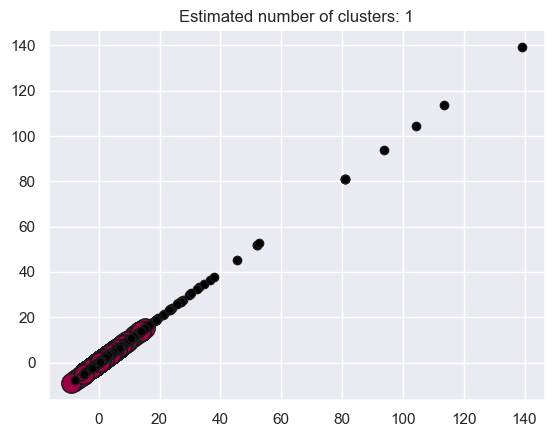

In [151]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy,
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

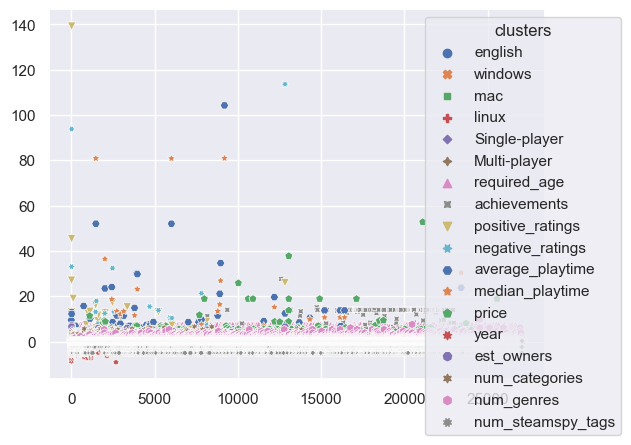

In [118]:
import seaborn as sns
p=sns.scatterplot(data=X,
                  legend="full",palette="deep")
sns.move_legend(p,"upper right",bbox_to_anchor=(1.17,1.),title="clusters")
plt.show()

In [155]:
#taking 1.13 as eps

In [217]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=1.13, min_samples=36).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 19
Estimated number of noise points: 4307
Silhouette Coefficient: 0.200


In [218]:
labels
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18], dtype=int64)

In [219]:
print(db)

DBSCAN(eps=1.13, min_samples=36)


In [215]:
X=StandardScaler().fit_transform(X)

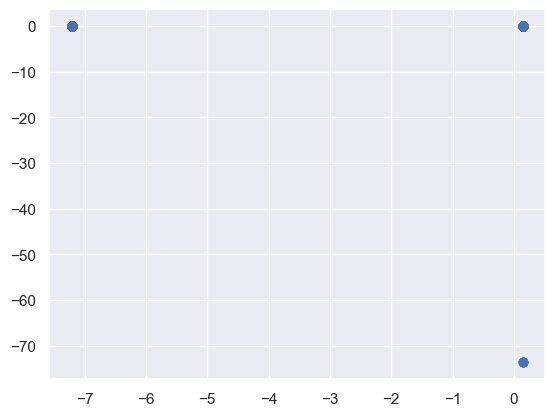

In [216]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

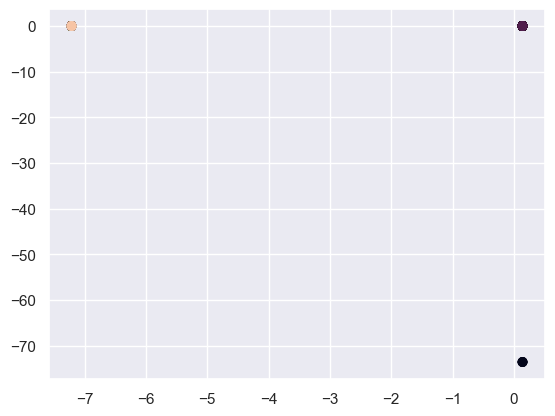

In [221]:
plt.scatter(x= X[:,0], y= X[:,1], c=db.fit_predict(X))

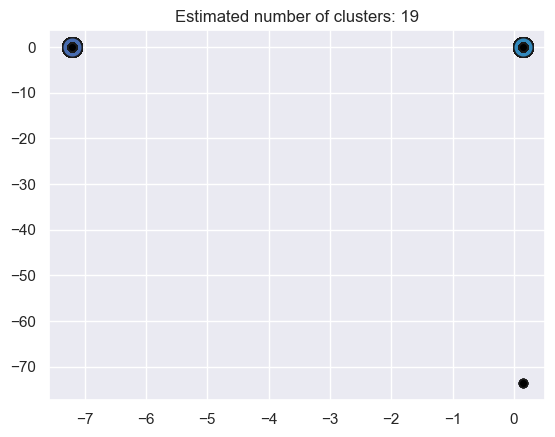

In [220]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [263]:
# Counting the amount of data in each cluster
cluster_count = Counter(labels)
print(cluster_count)
cluster_count.keys()

Counter({0: 12296, -1: 4307, 4: 3269, 3: 2288, 6: 1256, 5: 1125, 12: 372, 10: 285, 16: 272, 14: 251, 13: 233, 7: 215, 8: 191, 9: 174, 1: 171, 15: 120, 17: 82, 2: 64, 11: 59, 18: 45})


dict_keys([-1, 0, 1, 2, 4, 5, 3, 6, 14, 7, 12, 10, 8, 9, 13, 11, 15, 16, 18, 17])

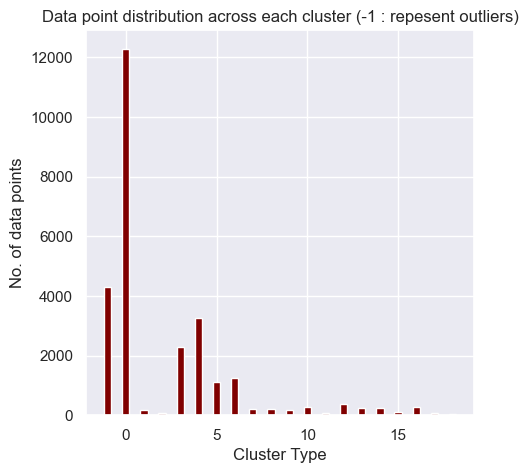

In [264]:
# Bar graph representing number of data points in each cluster

cluster_type = list(cluster_count.keys())
data_point_count = list(cluster_count.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(cluster_type, data_point_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Cluster Type")
plt.ylabel("No. of data points")
plt.title("Data point distribution across each cluster (-1 : repesent outliers)")
plt.show()

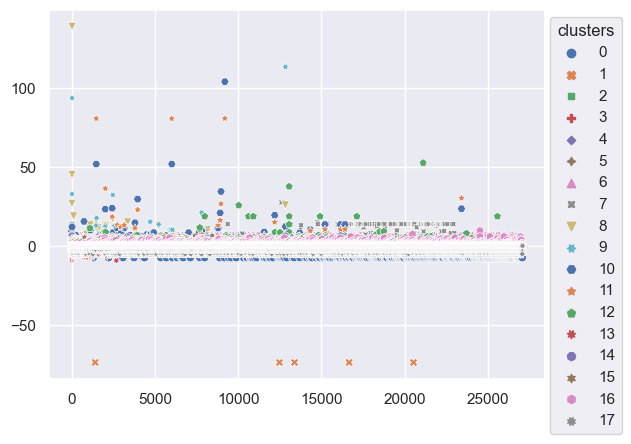

In [228]:
import seaborn as sns
p=sns.scatterplot(data=X,
                  legend="full",palette="deep")
sns.move_legend(p,"upper right",bbox_to_anchor=(1.17,1.),title="clusters")
plt.show()

In [1]:
#using pca

[0.13920753 0.10361823 0.09173049 0.08261533 0.08149385 0.06495104
 0.05911433 0.05643563 0.05567306 0.05377023 0.04965371 0.04470906
 0.03242164 0.02634309 0.02091799 0.02005415 0.01308176 0.00420888]
[260.4664893  224.71836923 211.43522329 200.6553841  199.28880627
 177.91539577 169.7332238  165.84301671 164.71874511 161.87934241
 155.55943456 147.61083637 125.70078943 113.30623617 100.96723554
  98.86044546  79.84606554  45.29013746]


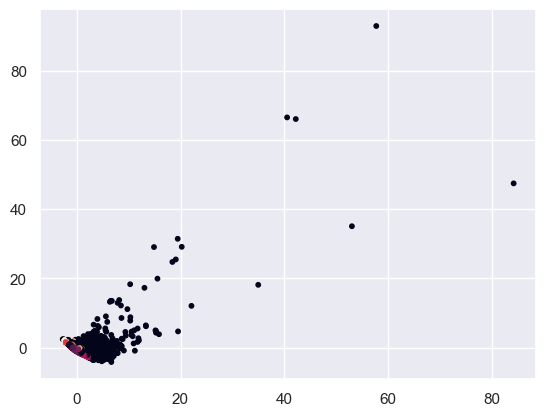

In [225]:
pca = PCA(n_components=18)
pca.fit(X)

X_trans = pca.transform(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X_trans[:,0],X_trans[:,1], c=labels, s=10)





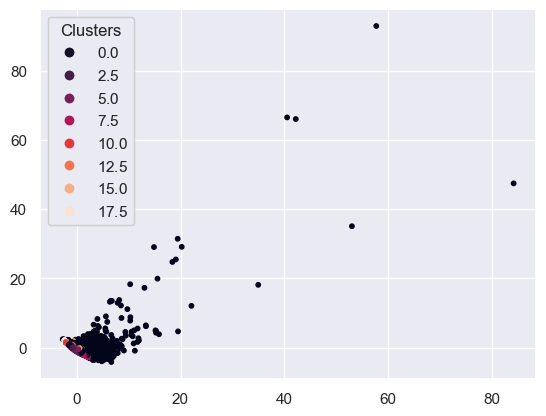

In [226]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_trans[:,0],X_trans[:,1], c=labels, s=10)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

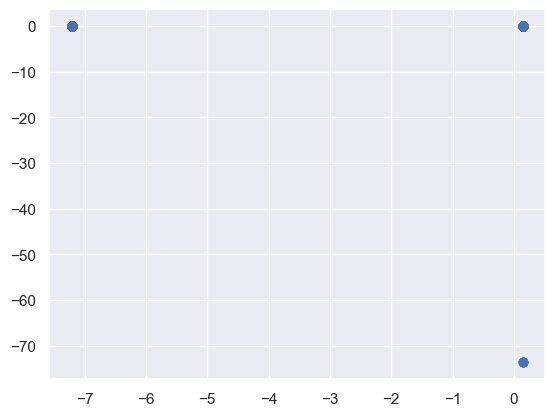

In [184]:
X=StandardScaler().fit_transform(X)
plt.scatter(X[:,0],X[:,1])
plt.show

In [205]:
#Dbscan for main columns

In [191]:
X = X[['Multi-player', 'positive_ratings', 'price','Single-player','negative_ratings','average_playtime','median_playtime']]
X = np.array(X)
X

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [192]:
labels = db.labels_
labels

array([-1, -1, -1, ...,  0,  0,  0], dtype=int64)

In [193]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [194]:
#evaluation metrics
sc = sklearn.metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)


Silhouette Coefficient:0.15


In [195]:
pca = PCA(n_components=7)
pca.fit(X)

X_trans = pca.transform(X)

print(pca.explained_variance_ratio_)



print(pca.singular_values_)

[0.13920753 0.10361823 0.09173049 0.08261533 0.08149385 0.06495104
 0.05911433]
[260.4664893  224.71836923 211.43522329 200.6553841  199.28880627
 177.91539572 169.73322379]


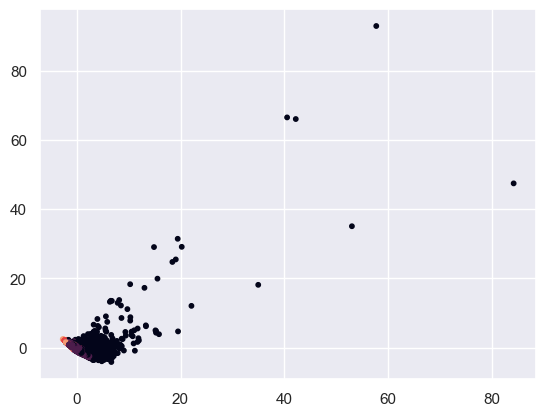

In [196]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X_trans[:,0],X_trans[:,1], c=labels, s=10)

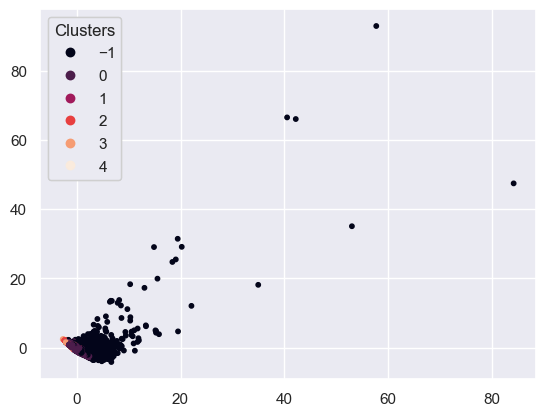

In [197]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_trans[:,0],X_trans[:,1], c=labels, s=10)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

plt.show()

In [198]:
# Counting the amount of data in each cluster
cluster_count = Counter(labels)
print(cluster_count)
cluster_count.keys()


Counter({0: 21322, -1: 3306, 2: 1843, 3: 434, 1: 87, 4: 83})


dict_keys([-1, 0, 1, 2, 3, 4])

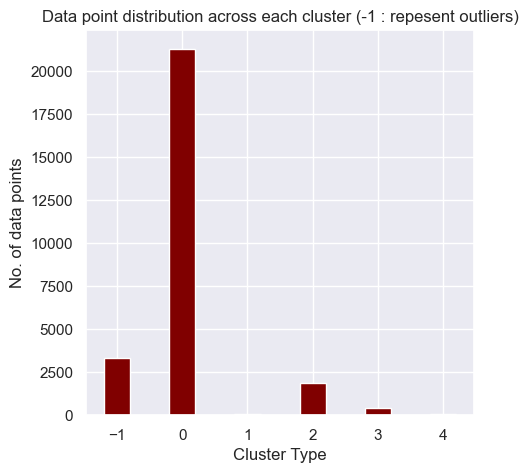

In [199]:
# Bar graph representing number of data points in each cluster

cluster_type = list(cluster_count.keys())
data_point_count = list(cluster_count.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(cluster_type, data_point_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Cluster Type")
plt.ylabel("No. of data points")
plt.title("Data point distribution across each cluster (-1 : repesent outliers)")
plt.show()

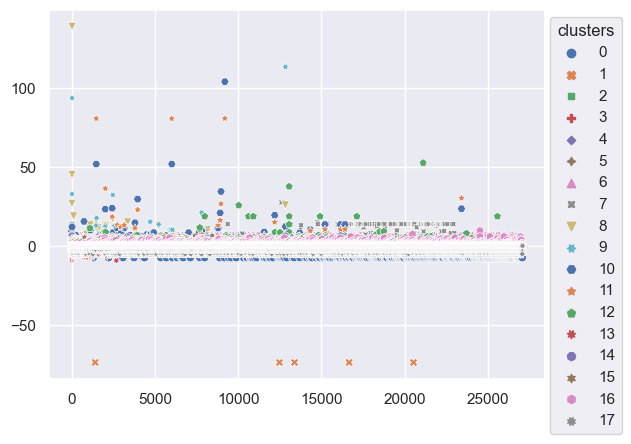

In [200]:
import seaborn as sns
p=sns.scatterplot(data=X,
                  legend="full",palette="deep")
sns.move_legend(p,"upper right",bbox_to_anchor=(1.17,1.),title="clusters")
plt.show()

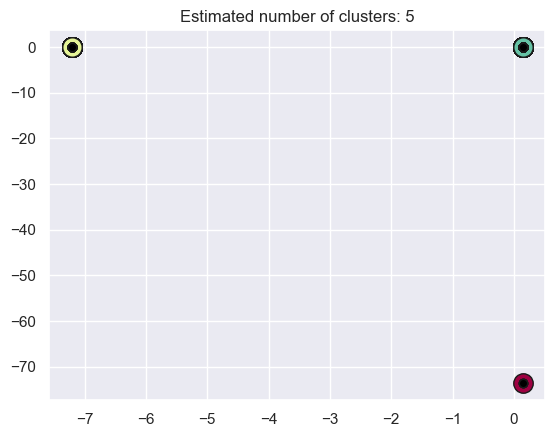

In [201]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

references:


https://www.reneshbedre.com/blog/dbscan-python.html

https://www.reneshbedre.com/blog/dbscan-python.html

